## Analysis of Data for Intensity of Light Lab ##

 

### Load basic python modules ###

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

//anaconda/envs/astroconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


### If you entered your data into a spreadsheet ###

We can read it right from the spreadsheet if it is save in excel format.  If you entered 

In [2]:
import xlread

ImportError: No module named xlread

### entering data by hand ###

In [14]:
# I'm making up data arrays
luminosity = 100000. # making up fake data
distance = np.arange(10,100,10)
# true lux
lux = luminosity/(4.*np.pi*distance**2) 
# making up experimental values
lux1 = lux + np.random.uniform(-1.,1.)*lux*.3
lux2 = lux + np.random.uniform(-1.,1.)*lux*.3
lux3 = lux + np.random.uniform(-1.,1.)*lux*.3

In [15]:
lux_ave = np.mean([lux1,lux2,lux3],axis=0)

In [16]:
lux_ave

array([ 72.29644457,  18.07411114,   8.03293829,   4.51852779,
         2.89185778,   2.00823457,   1.47543764,   1.12963195,   0.8925487 ])

In [17]:
lux_std = np.std([lux1,lux2,lux3],axis=0)

In [18]:
lux_std

array([ 12.1447708 ,   3.0361927 ,   1.34941898,   0.75904818,
         0.48579083,   0.33735474,   0.24785247,   0.18976204,   0.14993544])

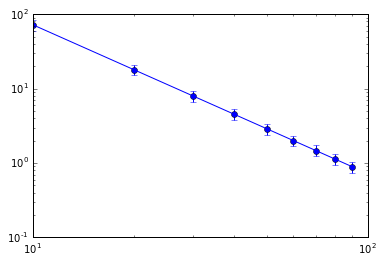

In [22]:
plt.figure()
plt.plot(distance,lux_ave,'bo')
plt.errorbar(distance,lux_ave,lux_std)
ax = plt.gca()
ax.set_yscale('log')
ax.set_xscale('log')